In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Fixed Values for Model

In [30]:
IA = 0 # deg
FZ = 500 # N

### Pacejka Fits

In [31]:
def lat_fit(data, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17):
    FZ = data[0]
    SA = data[1]
    IA = data[2]

    C = a0
    D = FZ * (a1 * FZ + a2) * (1 - a15 * IA**2)
    
    BCD = a3 * np.sin(np.arctan(FZ / a4) * 2) * (1 - a5 * abs(IA))
    B = BCD / (C * D)
    H = a8 * FZ + a9 + a10 * IA

    E = (a6 * FZ + a7) * (1 - (a16 * IA + a17) * np.sign(SA + H))

    V = a11 * FZ + a12 + (a13 * FZ + a14) * IA * FZ
    Bx1 = B * (SA + H)

    return ((D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V), B, C)

def long_fit(data, b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13):
    FZ = data[0] / 1000 * -1
    SR = data[1]

    C = b0
    D = FZ * (b1 * FZ + b2)
    
    BCD = (b3 * FZ**2 + b4 * FZ) * np.exp(-1 * b5 * FZ)
    B = BCD / (C * D)
    H = b9 * FZ + b10

    E = (b6 * FZ**2 + b7 * FZ + b8) * (1 - b13 * np.sign(SR + H))

    V = b11 * FZ + b12
    Bx1 = B * (SR + H)

    return ((D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V), B, C)

### Comstock Equations

In [32]:
def com_lat(SA, SR, FX, FY, Cs):
    return ((FX * FY) / np.sqrt(SR**2 * FY**2 + FX**2 * (np.tan(SA * (np.pi / 180)))**2)) * (np.sqrt((1 - SR)**2 * (np.cos(SA * (np.pi / 180)))**2 * FY**2 + (np.sin(SA * (np.pi / 180)))**2 * Cs**2) / (Cs * np.cos(SA * (np.pi / 180))))
        
def com_long(SA, SR, FX, FY, Ca):
    return ((FX * FY) / np.sqrt(SR**2 * FY**2 + FX**2 * (np.tan(SA * (np.pi / 180)))**2)) * (np.sqrt(SR**2 * Ca**2 + (1 - SR)**2 * (np.cos(SA * (np.pi / 180)))**2 * FX**2) / Ca)

### Pacejka Fit Coefficients

In [33]:
front_lat = [0.349, -0.00115, 8.760, 730.300, 1745.322, 0.0139, -0.000277, 1.02025435, 0.000158, 0.149, -0.1595, 0.0329, 9.153,  0.00001406, 0.0328, 0.00362, -0.0143, -0.0116]

front_long = [0.771, 192.991, 3001.746, -403.002, 702.111, -0.492, 2.223, -1.97729069, -4.017, -2.669, 3.366, 2.044, -1.263, 0.353]

rear_lat = [1.384, -0.0003117, -2.936, 668.1, 1599, 0.03877, 0.0003177, 0.6252, 7.733e-05, -0.08382, -0.1171, 0.04597, 3.107, 5.41e-05, 0.04736, 0.005249, 0.0508, -0.1956]

rear_long = [ 8.43000601e-01,  1.95979747e+02,  3.00080094e+03, -4.01069202e+02,
        7.00940702e+02, -7.09365546e-01,  2.05271682e+00, -1.89172501e+00,
       -7.11416172e-01, -1.16640886e+00,  2.99405455e+00,  2.16709629e+00,
       -1.31915722e+00,  8.22994474e-01]

### Rear Tire

In [34]:
def comstock(SR, SA):
    FX_fit = long_fit([FZ, SR], *rear_long)
    FY_fit = lat_fit([FZ, SA, IA], *rear_lat)

    FX = FX_fit[0] * -1
    FY = FY_fit[0]

    mu_x = abs(FX_fit[0] / FZ)
    mu_y = abs(FY_fit[0] / FZ)

    B_x = abs(FX_fit[1])
    B_y = abs(FY_fit[1]) 

    C_x = abs(FX_fit[2])
    C_y = abs(FY_fit[2])

    P1_x = abs(long_fit([FZ, SR], *rear_long)[0]) / FZ
    P1_y = abs(lat_fit([FZ, SA, IA], *rear_lat)[0]) / FZ

    Cs = abs(B_x * C_x * SR / P1_x * mu_x * FZ)
    Ca = abs(B_y * C_y * SA / P1_y * mu_y * FZ)

    print(mu_x, mu_y)

    return (com_long(SA, SR, FX, FY, Ca), com_lat(SA, SR, FX, FY, Cs))

In [35]:
# print(comstock(3, 0.5))
print(long_fit([FZ, 0], *rear_long))

(-843.4790742503671, 0.2583868501493008, 0.843000601)


### Rear Tire Plots

[[1.36880508 1.36880508 1.36880508 ... 1.36880508 1.36880508 1.36880508]
 [1.36955459 1.36955459 1.36955459 ... 1.36955459 1.36955459 1.36955459]
 [1.37030362 1.37030362 1.37030362 ... 1.37030362 1.37030362 1.37030362]
 ...
 [1.91285268 1.91285268 1.91285268 ... 1.91285268 1.91285268 1.91285268]
 [1.91323532 1.91323532 1.91323532 ... 1.91323532 1.91323532 1.91323532]
 [1.91361771 1.91361771 1.91361771 ... 1.91361771 1.91361771 1.91361771]] [[2.79191229 2.79232814 2.79274507 ... 3.13863607 3.13855707 3.13847764]
 [2.79191229 2.79232814 2.79274507 ... 3.13863607 3.13855707 3.13847764]
 [2.79191229 2.79232814 2.79274507 ... 3.13863607 3.13855707 3.13847764]
 ...
 [2.79191229 2.79232814 2.79274507 ... 3.13863607 3.13855707 3.13847764]
 [2.79191229 2.79232814 2.79274507 ... 3.13863607 3.13855707 3.13847764]
 [2.79191229 2.79232814 2.79274507 ... 3.13863607 3.13855707 3.13847764]]
[[1.36880508 1.36880508 1.36880508 ... 1.36880508 1.36880508 1.36880508]
 [1.36955459 1.36955459 1.36955459 ... 

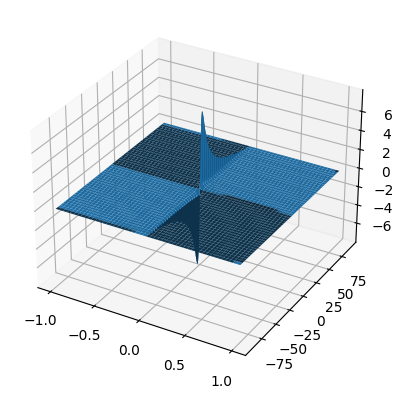

In [36]:
model_SA_data = np.linspace(-90, 90, 1000)
model_SR_data = np.linspace(-1, 1, 1000)

SA, SR = np.meshgrid(model_SA_data, model_SR_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

FX = comstock(SR, SA)[0] * FZ
FY = comstock(SR, SA)[1] * FZ

print(FY)

ax = plt.axes(projection='3d')

fig.add_axes(ax)
# ax.plot_surface(SR, SA, FX)
ax.plot_surface(SR, SA, FY)

### Comstock Outputs

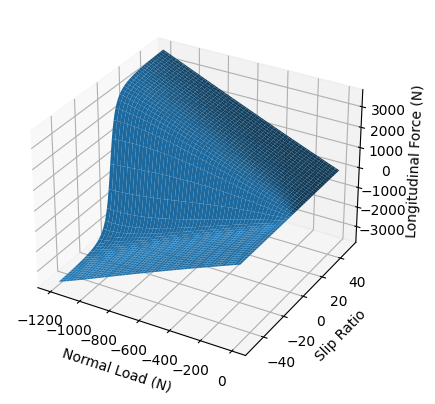

In [37]:
model_x_data = np.linspace(-1200, -1, 1000)
model_y_data = np.linspace(-50, 50, 100)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

Z = long_fit([X, Y], *rear_long)[0]

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(X, Y, Z)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Ratio')
ax.set_zlabel('Longitudinal Force (N)')

plt.show()